### Task 4.1 Supervised Learning - Regression

- Load dataset (heartdata.csv)
  - Use `pandas.read_csv()`
- Check assumptions of a linear regression model, see also Linear Regression Tutorial
  - Use `df.corr()` and `scipy.stats.pearsonr()` for correlation tests
  - Use `matplotlib.pyplot.hist()` for histogram plots
  - Use `seaborn.pairplot()` or `matplotlib.pyplot.scatter()` for visualizing relationships
- Fit a linear regression model
  - Use `LinearRegression` from `sklearn.linear_model`
  - Fit the model using `.fit(X, y)`
- Evaluate the model
  - Use `.coef_` and `.intercept_` to extract coefficients
  - Use `sklearn.metrics.r2_score()` for model performance
  - Use `matplotlib.pyplot.scatter()` to visualize predictions
- Train the model using cross-validation
  - Use `train_test_split` from `sklearn.model_selection`
  - Fit model on training data and evaluate on test data

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

data = pd.read_csv("./assets/heartdata.csv")

In [9]:
data.rename(columns={'Unnamed: 0' : 'index'}, inplace=True)
data

,index,biking,smoking,heartdisease
0,1,30.801246,10.896608,11.769423
1,2,65.129215,2.219563,2.854081
2,3,1.959665,17.588331,17.177803
3,4,44.800196,2.802559,6.816647
4,5,69.428454,15.974505,4.062224
...,...,...,...,...
493,494,47.660440,27.562464,11.294392
494,495,45.097203,21.385620,9.616762
495,496,8.279743,6.423720,13.495168
496,497,42.345863,20.741328,10.115865


Firstly, we calculate the correlation matrix and the pearson correlation.

The first value that is returend is in a range from -1 and 1. The higher it is, the more positive and the lower it is, the more negative the correlation is.
The second value is the p-Value. p<0.05 = significant correlation; p>0.05 insignificant correlation

The more biking, the lower is the chance of heartdisease.

In [13]:
data.corr()
pearson_biking_heartdisee = pearsonr(data['biking'], data['heartdisease'])
pearson_smoking_heartdisee = pearsonr(data['smoking'], data['heartdisease'])

In [ ]:

pearson_biking_heartdisee

PearsonRResult(statistic=np.float64(-0.9354554743738543), pvalue=np.float64(3.549744548626203e-226))

In [19]:
pearson_smoking_heartdisee

PearsonRResult(statistic=np.float64(0.3091309790873179), pvalue=np.float64(1.7293758902652505e-12))

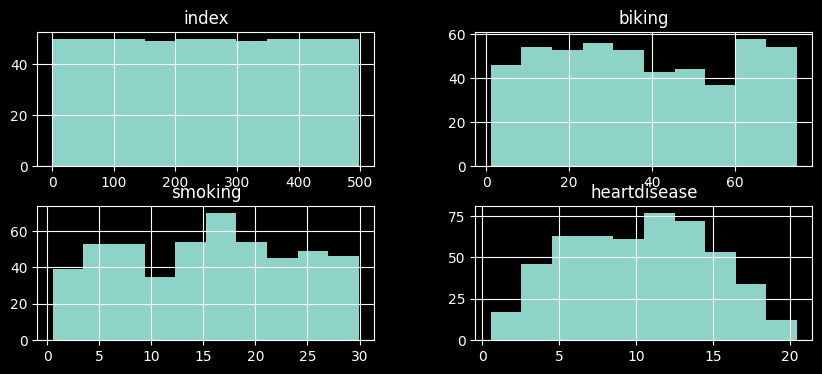

In [16]:
data.hist(figsize=(10, 4))
plt.show()

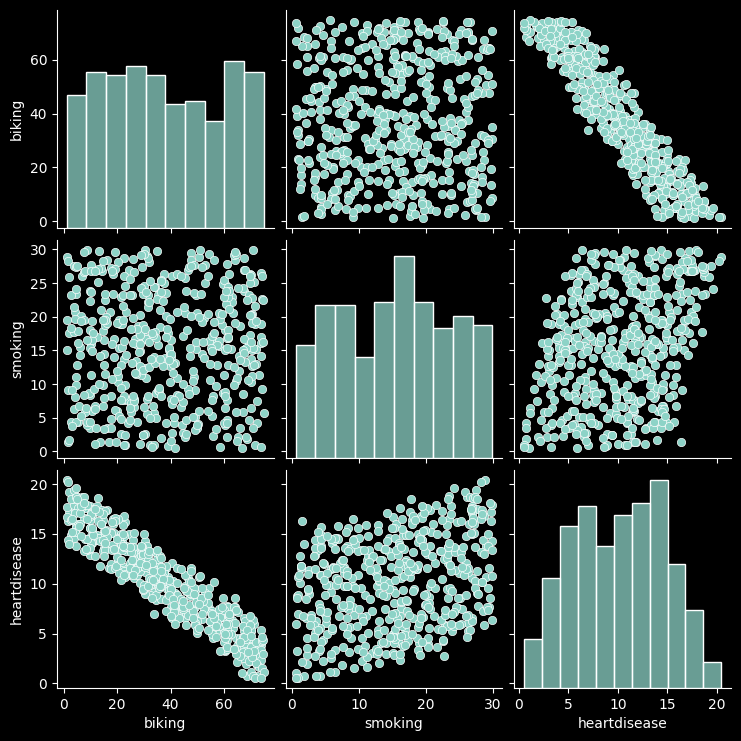

In [18]:
sns.pairplot(data[['biking', 'smoking', 'heartdisease']])
plt.show()

Create the linear regression model

In [21]:
x = data[['biking', 'smoking']]
y = data['heartdisease']

model = LinearRegression()
model.fit(x, y)

LinearRegression()

intercept_ = value of heartdisease when there is no biking and no smoking (when all inputs are zero)

coef_ = slope for each value. e.g. each additional unit of biking reduces the heart disease by -0.20 units

In [22]:
model.coef_

array([-0.20013305,  0.17833391])

In [23]:
model.intercept_

np.float64(14.984657987225848)

The R² is used to determine how well the model explains the variability of the target value.
The closer to 1, the better.

In [43]:
y_pred = model.predict(x)
r2 = r2_score(y, y_pred)

r2

0.9796174523377278

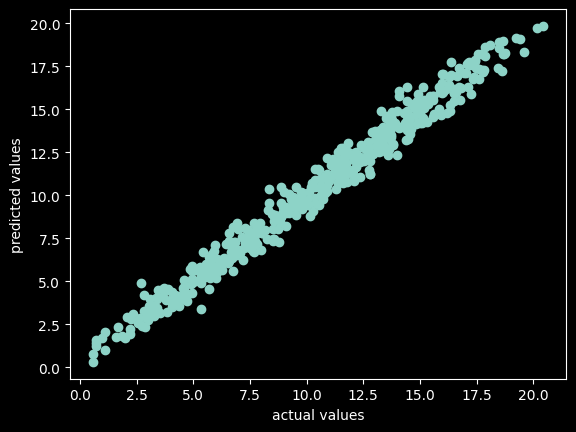

In [44]:
plt.scatter(y, y_pred)

plt.xlabel("actual values")
plt.ylabel("predicted values")
plt.show()

We now compare the model R² with the R² of the model considering test data and check for overfitting problems etc. that way.

In [46]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model_cv = LinearRegression()
model_cv.fit(X_train, y_train)
y_test_pred = model_cv.predict(X_test)

print("Test-R²:", r2_score(y_test, y_test_pred))

Test-R²: 0.9751106638392245
